# Data preprocessing

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gensim.models import word2vec

In [3]:
current_directory = os.getcwd()
print(current_directory)

c:\Users\seowoo kim\Desktop\노나없


In [4]:
# Import usa data
data_j = pd.read_csv("./review_data_american_only_sentences.csv")
data_j.head()

,SeparatedSentences
0,Wasn't what I expected.
1,Really enjoyed it.
2,Including the hope for redemption at the end.
3,A true feel good movie that I wish I saw in th...
4,Anne Hathaway and Robert DeNiro have great che...


# Preprocessing Strategy

1. Expand contractions : pycontractions
2. lowercase
3. change numbers to words : inflect
4. Remove Punctuations : '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
5. Remove remained emoji, japanese, chinese, korean words
6. PoS_tagging: from nltk import pos_tag
7. If needed, remove PRP, TO, DT, etc. 
8. Stemming: PorterStemmer
9. Find out average sentence length
10. Wordcloud


In [5]:
# Pycontractions doesn't work due to dependency issue. I just modulized it by myself.

from contractions import expand_contractions

contracted_list = []
Sentences = data_j['SeparatedSentences'].copy()

for sentence in Sentences:
    expanded_sentence = expand_contractions(sentence)
    contracted_list.append(expanded_sentence)


In [6]:
contracted_list[:5]

['was not what I expected.',
 'Really enjoyed it.',
 'Including the hope for redemption at the end.',
 'A true feel good movie that I wish I saw in theaters.',
 'Anne Hathaway and Robert DeNiro have great chemistry and the movie tells a great story of 2 people generations apart growing closer and learning from each other.']

In [7]:
# Transform all sentences into lower case! easy!

contracted_list = [text.lower() for text in contracted_list]

In [8]:
contracted_list[:5]

['was not what i expected.',
 'really enjoyed it.',
 'including the hope for redemption at the end.',
 'a true feel good movie that i wish i saw in theaters.',
 'anne hathaway and robert deniro have great chemistry and the movie tells a great story of 2 people generations apart growing closer and learning from each other.']

In [9]:
# Change numbers into words
import inflect
p = inflect.engine()

def convert_number(text):
    def replace_number(match):
        number = match.group()
        return p.number_to_words(number)
    
    converted_text = re.sub(r'\d+', replace_number, text)
    return converted_text

inflected_list = []
inflected_list = [convert_number(text) for text in contracted_list]         

In [10]:
# Remove punctuations
rm_punctionations = inflected_list.copy()

def rm_punct(text):
    cleaned_text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
    return cleaned_text

rm_punctionations = [rm_punct(text) for text in rm_punctionations]

In [11]:
rm_punctionations

['was not what i expected ',
 'really enjoyed it ',
 'including the hope for redemption at the end ',
 'a true feel good movie that i wish i saw in theaters ',
 'anne hathaway and robert deniro have great chemistry and the movie tells a great story of two people generations apart growing closer and learning from each other ',
 'there is strong character development and a solid cast all around ',
 'i recommend it to anyone ',
 'all the pieces seem to be there except a truly appropriate third act ',
 'the intern  has chemistry rich lead performances and a tenured auteur behind the camera ',
 'brilliant movie ',
 'so warm  so satisfying and so moved ',
 'recommend',
 'these two bonified great actors somehow have a great chemistry that truly makes this movie worth watching ',
 'it rushes the story along but that does not take away from the heartwarming affect it was going for ',
 'the movie was very good ',
 'i cannot believe what other critics are rating and saying about this movie ',
 't

In [12]:
# remove japanese, korean, chinese words

def only_english(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return cleaned_text

rm_punctionations = [only_english(text) for text in rm_punctionations]

In [13]:
# POS_tagging

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Text를 단어 토큰과 POS 태그로 변환
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

tag_sentence = rm_punctionations.copy()

tag_sentence = [pos_tagging(text) for text in tag_sentence]


[nltk_data] Downloading package punkt to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seowoo kim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
tag_sentence

[[('was', 'VBD'),
  ('not', 'RB'),
  ('what', 'WP'),
  ('i', 'NN'),
  ('expected', 'VBD')],
 [('really', 'RB'), ('enjoyed', 'VBN'), ('it', 'PRP')],
 [('including', 'VBG'),
  ('the', 'DT'),
  ('hope', 'NN'),
  ('for', 'IN'),
  ('redemption', 'NN'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('end', 'NN')],
 [('a', 'DT'),
  ('true', 'JJ'),
  ('feel', 'NN'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('that', 'IN'),
  ('i', 'JJ'),
  ('wish', 'VBP'),
  ('i', 'NN'),
  ('saw', 'NN'),
  ('in', 'IN'),
  ('theaters', 'NNS')],
 [('anne', 'JJ'),
  ('hathaway', 'NN'),
  ('and', 'CC'),
  ('robert', 'NN'),
  ('deniro', 'NN'),
  ('have', 'VBP'),
  ('great', 'JJ'),
  ('chemistry', 'NN'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('movie', 'NN'),
  ('tells', 'VBZ'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('story', 'NN'),
  ('of', 'IN'),
  ('two', 'CD'),
  ('people', 'NNS'),
  ('generations', 'NNS'),
  ('apart', 'RB'),
  ('growing', 'VBG'),
  ('closer', 'RBR'),
  ('and', 'CC'),
  ('learning', 'VBG'),
  ('from', 'IN'),
  ('e

In [15]:
nltk.download('tagsets')
nltk.help.upenn_tagset('WRB')

WRB: Wh-adverb
    how however whence whenever where whereby whereever wherein whereof why


[nltk_data] Downloading package tagsets to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Remove IN, PRP, CC, PRP$, DT, TO, FW, WP
def remove_specific_tags(tagged_sentence, tags_to_remove):
    return [word for word, tag in tagged_sentence if tag not in tags_to_remove]

tags_to_remove = {"IN", "PRP", "CC", "PRP$", "DT", "TO", "FW", "WP", "WRB"}

tag_rm = tag_sentence.copy()
tag_rm = [remove_specific_tags(text, tags_to_remove) for text in tag_rm]

In [17]:
tag_rm_sentence = [pos_tag(sentence) for sentence in tag_rm]
tag_rm_sentence[:5]

[[('was', 'VBD'), ('not', 'RB'), ('i', 'JJ'), ('expected', 'VBD')],
 [('really', 'RB'), ('enjoyed', 'VBN')],
 [('including', 'VBG'), ('hope', 'NN'), ('redemption', 'NN'), ('end', 'NN')],
 [('true', 'JJ'),
  ('feel', 'NN'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('i', 'IN'),
  ('wish', 'JJ'),
  ('i', 'NN'),
  ('saw', 'VBD'),
  ('theaters', 'NNS')],
 [('anne', 'JJ'),
  ('hathaway', 'NN'),
  ('robert', 'NN'),
  ('deniro', 'NN'),
  ('have', 'VBP'),
  ('great', 'JJ'),
  ('chemistry', 'NN'),
  ('movie', 'NN'),
  ('tells', 'VBZ'),
  ('great', 'JJ'),
  ('story', 'NN'),
  ('two', 'CD'),
  ('people', 'NNS'),
  ('generations', 'NNS'),
  ('apart', 'RB'),
  ('growing', 'VBG'),
  ('closer', 'RBR'),
  ('learning', 'VBG'),
  ('other', 'JJ')]]

In [18]:
# Lemmatize & remove stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

# inflect engine initialize
p = inflect.engine()

# WordNetLemmatizer initialize
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def singularize_and_lemmatize(tagged_words):
    new_words = []
    
    for word, tag in tagged_words:
        if tag.startswith('N'):
            singular_word = p.singular_noun(word)
            if singular_word:
                new_words.append(singular_word)
            else:
                new_words.append(word)
        else:
            wn_tag = get_wordnet_pos(tag)
            if wn_tag is not None:
                lemma_word = lemmatizer.lemmatize(word, wn_tag)
                new_words.append(lemma_word)
            else:
                new_words.append(word)
    
    return new_words

[nltk_data] Downloading package wordnet to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
processed_sentences = [singularize_and_lemmatize(sentence) for sentence in tag_rm_sentence]

In [20]:
processed_sentences

[['be', 'not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'deniro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'be', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all',
  'piece',
  'seem',
  'be',
  'there',
  'truly',
  'appropriate',
  'third',
  'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'awa

In [21]:
# stopwords
def remove_verbs(words):
    verbs_to_remove = {"am", "be", "are", "was", "were", "being", "is"}
    filtered_words = [word for word in words if word not in verbs_to_remove]
    return filtered_words

processed_sentences_no_stopwords = [remove_verbs(word) for word in processed_sentences]

In [22]:
processed_sentences_no_stopwords

[['not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'deniro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all', 'piece', 'seem', 'there', 'truly', 'appropriate', 'third', 'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'away',
  'heartwarming',
  'affect',


In [23]:
# final..refine!

def replace_words(sentence):
    replacements = {
        r'\binternben\b': ['intern', 'ben'],
        r'\bexperiencesben\b': ['experience', 'ben'],
        r'\bbeingben\b': ['being', 'ben'],
        r'\bbentwo\b': ['ben', 'two'],
        r'\bbens\b': ['ben'],
        r'\bitben\b': ['it', 'ben'],
        r'\bheartben\b': ['heart', 'ben'],
        r'\botherben\b': ['other', 'ben'],
        r'\bbentheir\b': ['ben', 'their'],
        r'\bfamilyben\b': ['family', 'ben'],
        r'\bfunben\b': ['fun', 'ben'],
        r'\binternrobert\b': ['intern', 'robert'],
        r'\buprobert\b': ['up', 'robert'],
        r'\brealisticrobert\b': ['realistic', 'robert'],
        r'\btemperrobert\b': ['temper', 'robert'],
        r'\bplacerobert\b': ['place', 'robert'],
        r'\btimesrobert\b': ['time', 'robert'],
        r'\bniros\b': ['niro'],
        r'\bdeniro\b': ['niro'],
        r'\bniroi\b': ['niro', 'I'],
        r'\bmyershe\b': ['she'],
        r'\bmyersworking\b': ['working'],
        r'\banhathaway\b': ['hathaway'],
        r'\bsceneanhathaway\b': ['scene', 'hathaway'],
        r'\banhathawayhis\b': ['hathaway', 'his'],
        r'\bhathawayde\b': ['hathaway', 'de'],
        r'\bhathaways\b': ['hathaway'],
        r'\banhathaways\b': ['hathaway'],
        r'\brottenanhathaway\b': ['rotten', 'hathaway'],
        r'\btherejules\b': ['there', 'jule'],
        r'\bweakjule\b': ['weak', 'jule'],
        r'\bjules\b': ['jule'],
        r'\broutinejule\b': ['routine', 'jule'],
        r'\bagejule\b': ['age', 'jule'],
    }
    for pattern, replacement in replacements.items():
        sentence = re.sub(pattern, ' '.join(replacement), sentence)

    return sentence.split()

modified_sentences = [replace_words(' '.join(sentence)) for sentence in processed_sentences_no_stopwords]

In [24]:
modified_sentences

[['not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'niro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all', 'piece', 'seem', 'there', 'truly', 'appropriate', 'third', 'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'away',
  'heartwarming',
  'affect',
  

In [25]:
# remove empty list
modified_sentences = [sentence for sentence in modified_sentences if sentence]

In [26]:
## remove words with len=1

modified_sentences_2 = modified_sentences.copy()

modified_sentences_2 = [[i for i in word if len(i) > 1] for word in modified_sentences_2]


modified_sentences_2[:10]


[['not', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'wish', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'niro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'strong', 'character', 'development', 'solid', 'cast'],
 ['recommend', 'anyone'],
 ['all', 'piece', 'seem', 'there', 'truly', 'appropriate', 'third', 'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie']]

In [27]:
lengths = [len(sentence) for sentence in modified_sentences_2]

# sentence lenths discriptive analysis
median = np.median(lengths)
mean = np.mean(lengths)
percentile_75 = np.percentile(lengths, 75)
percentile_90 = np.percentile(lengths, 90)
percentile_95 = np.percentile(lengths, 95)

print ('median: ', median, 
       'mean: ', mean, 
       'per_75: ', percentile_75, 
       'per_90: ', percentile_90, 
       'per_95: ', percentile_95)

median:  8.0 mean:  9.360747365059087 per_75:  12.0 per_90:  18.0 per_95:  22.0


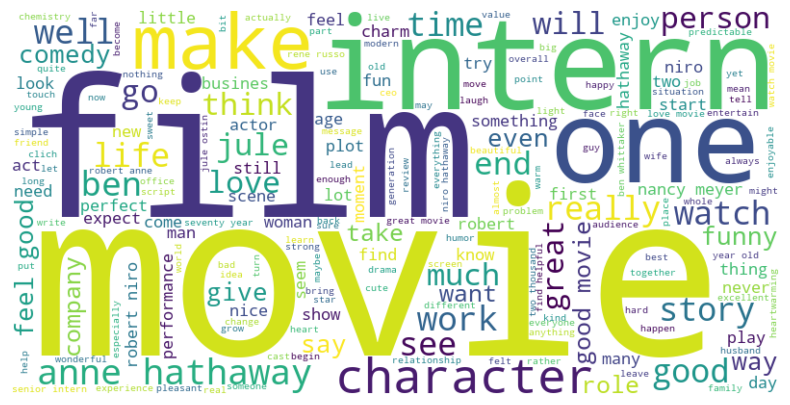

In [28]:
#wordcloud
from wordcloud import WordCloud
text_data_usa = " ".join([" ".join(sentence) for sentence in modified_sentences_2])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_usa)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
from collections import Counter
all_words = [word for sentence in modified_sentences_2 for word in sentence]
word_freq= Counter(all_words)
print(word_freq)

Counter({'movie': 3039, 'not': 2214, 'have': 2155, 'do': 1590, 'film': 1344, 'good': 1316, 'hathaway': 1174, 'intern': 1047, 'one': 880, 'great': 785, 'character': 782, 'make': 772, 'robert': 744, 'that': 737, 'very': 712, 'ben': 707, 'anne': 689, 'so': 686, 'see': 682, 'just': 680, 'watch': 655, 'old': 648, 'jule': 619, 'work': 615, 'well': 605, 'story': 604, 'niro': 599, 'really': 586, 'life': 586, 'feel': 585, 'get': 575, 'can': 569, 'would': 537, 'two': 532, 'more': 532, 'time': 526, 'there': 523, 'love': 489, 'person': 472, 'end': 468, 'go': 468, 'comedy': 465, 'will': 434, 'much': 399, 'up': 397, 'company': 396, 'too': 386, 'funny': 367, 'think': 366, 'give': 359, 'also': 353, 'play': 344, 'meyer': 336, 'woman': 335, 'way': 333, 'year': 333, 'say': 329, 'role': 319, 'want': 319, 'young': 317, 'find': 315, 'even': 314, 'which': 314, 'out': 313, 'other': 312, 'take': 304, 'could': 303, 'nice': 300, 'man': 291, 'actor': 287, 'thing': 287, 'nancy': 285, 'enjoy': 280, 'little': 276, '

In [30]:
df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
df_word_freq.sort_values(by='Frequency', ascending=False, inplace=True)
df_word_freq

,Word,Frequency
11,movie,3039
0,not,2214
19,have,2155
67,do,1590
81,film,1344
...,...,...
5023,benign,1
5019,plug,1
5016,adamantly,1
5015,tag,1


In [31]:
#! pip install openpyxl
df_word_freq.to_excel('word_freq_america.xlsx')

# word2Vec

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences=modified_sentences_2, vector_size=100, window=22, min_count=2, workers=1)

In [34]:
model.save("word2vec_america.model")

In [35]:
word_vectors = model.wv

In [36]:
similar_words = word_vectors.most_similar('intern')
print(similar_words)

[('retirement', 0.9959020018577576), ('apply', 0.9955831170082092), ('internship', 0.9943088293075562), ('whitaker', 0.9942000508308411), ('site', 0.9928991198539734), ('fashion', 0.9924650192260742), ('retire', 0.9923211336135864), ('commerce', 0.9921563863754272), ('online', 0.9916172623634338), ('program', 0.9908620715141296)]


In [37]:
similar_words_100 = word_vectors.most_similar('ben', topn=100)
print("Top 100 similar words:", similar_words_100)


Top 100 similar words: [('online', 0.997878909111023), ('fashion', 0.9976353049278259), ('retire', 0.9972067475318909), ('retired', 0.9967267513275146), ('jule', 0.996306836605072), ('company', 0.9961379766464233), ('senior', 0.9955204725265503), ('run', 0.9954521656036377), ('apply', 0.9946756362915039), ('program', 0.9943433403968811), ('young', 0.993930995464325), ('whitaker', 0.9919191598892212), ('commerce', 0.9910964965820312), ('retailer', 0.988544225692749), ('retirement', 0.9880651831626892), ('internship', 0.9868780970573425), ('old', 0.9867656826972961), ('year', 0.9867207407951355), ('ceo', 0.9852834939956665), ('intern', 0.9852529764175415), ('website', 0.9848876595497131), ('join', 0.98395836353302), ('busy', 0.9835464358329773), ('site', 0.9830223917961121), ('work', 0.9822518825531006), ('whittaker', 0.9809632897377014), ('president', 0.9809448719024658), ('seize', 0.9806617498397827), ('position', 0.9794400930404663), ('citizen', 0.9787900447845459), ('ostin', 0.978772

In [38]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [41]:
df_word_freq = pd.read_excel('C:/Users/seowoo kim/Desktop/노나없/word_freq_america.xlsx')

In [46]:
df_word_freq_new = df_word_freq[df_word_freq['Frequency']>1]

In [43]:
from transformers import pipeline

In [44]:
model = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
c:\Users\seowoo kim\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [47]:
sentiment_label = []
confidence_score = []

# Analyze sentiment and store results
for word in df_word_freq_new['Word']:
    result = model(word)
    sentiment_label.append(result[0]['label'])
    confidence_score.append(result[0]['score'])

# Add the sentiment results to the original DataFrame
df_word_freq_new['Sentiment Label'] = sentiment_label
df_word_freq_new['Confidence Score'] = confidence_score

# Display the updated DataFrame
print(df_word_freq_new)

      Unnamed: 0      Word  Frequency Sentiment Label  Confidence Score
0             11     movie       3039             NEU          0.898441
1              0       not       2214             NEU          0.831674
2             19      have       2155             NEU          0.853081
3             67        do       1590             NEU          0.842028
4             81      film       1344             NEU          0.886869
...          ...       ...        ...             ...               ...
4540        3604     thick          2             NEU          0.879815
4541        7894    foible          2             NEU          0.903503
4542        3952      spit          2             NEU          0.873997
4543        7898    emerge          2             NEU          0.886416
4544        7814  decisive          2             NEU          0.851662

[4545 rows x 5 columns]


C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_67292\3591878570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_freq_new['Sentiment Label'] = sentiment_label
C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_67292\3591878570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_freq_new['Confidence Score'] = confidence_score


In [48]:
df_word_freq_new.to_excel('sentiment_word_usa.xlsx')

In [49]:
NEU = df_word_freq_new[df_word_freq_new['Sentiment Label']=='NEU']
len(NEU)
POS = df_word_freq_new[df_word_freq_new['Sentiment Label']=='POS']
len(POS)
NEG = df_word_freq_new[df_word_freq_new['Sentiment Label']=='NEG']
len(NEG)

203

In [50]:
from gensim.models import Word2Vec
model_path = "C:/Users/seowoo kim/Desktop/노나없/word2vec_usa.model"
model = Word2Vec.load(model_path)

In [51]:
old_words = ['ben', 'senior', 'old', 'older', 'elderly', 'elder']
young_words = ['jule', 'young', 'younger', 'youngster']

In [52]:
pos_words = [
    "gentlemanly", "strong", "helpful", "handsome", "likable", "hope", "smart", "adorable", "cool", "intelligent", 
    "successful", "healthy", "powerful", "talented", "charming", "courage", "encouragement", "respect", "clever", 
    "optimistic", "attractive", "courteous", "wise", "wisdom", "passion", "passionate", "compassion", "lovely", "beloved",
    "proud", "commendable", "productive", "sweetness", "enthusiasm", "genius", "goodhearted", "flawless","dependable","brilliance"
]
neg_words = [
    "arrogant", "stupid", "bully", "angry", "fear", "rude", "awful",
    "stubborn", "negative", "ridiculous", "pathetic", "tired", "shame", "useless", "foul", "bitch","embarrass",
    "pity", "dumb", "creepy", "ugly", "irritate", "ignorance","incompetent", "neurotic","disrespect","insult",
    "fool", "manipulative", "subvert","bully", "immature", "frustrating", "loser"
]

In [53]:
# cosine similarity 
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = np.array([cos_sim(w, a) for a in A])
    c_b = np.array([cos_sim(w, b) for b in B])
    mean_A = np.mean(c_a)
    mean_B = np.mean(c_b)
    return mean_A - mean_B

# Target A - Target B
def s_group(X, A, B):
    return np.array([s(x, A, B) for x in X])

#WEAT
def weat_score(X, Y, A, B):
    s_X = s_group(X, A, B)
    s_Y = s_group(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X - mean_Y) / std_dev

In [54]:
X = np.array([model.wv.get_vector(word) for word in old_words if word in model.wv])
Y = np.array([model.wv.get_vector(word) for word in young_words if word in model.wv])
A = np.array([model.wv.get_vector(word) for word in pos_words if word in model.wv])
B = np.array([model.wv.get_vector(word) for word in neg_words if word in model.wv])

In [55]:
# WEAT score result
weat_result = round(weat_score(X, Y, A, B), 3)
print("WEAT Score:", weat_result)

WEAT Score: -0.27


In [56]:
def weat_score(X, Y, A, B):
    s_X = s_group(X, A, B)
    s_Y = s_group(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    # 표준 편차 출력
    print("Standard Deviation:", std_dev)
    
    if std_dev == 0:
        return float('nan')
    
    return (mean_X - mean_Y) / std_dev

X = np.array([model.wv.get_vector(word) for word in old_words if word in model.wv])
Y = np.array([model.wv.get_vector(word) for word in young_words if word in model.wv])
A = np.array([model.wv.get_vector(word) for word in pos_words if word in model.wv])
B = np.array([model.wv.get_vector(word) for word in neg_words if word in model.wv])

# WEAT score result
weat_result = round(weat_score(X, Y, A, B), 3)
print("WEAT Score:", weat_result)

Standard Deviation: 0.0069878725
WEAT Score: -0.27
